In [ ]:


import sqlite3

# Create database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert sample data
sales_data = [
    ("Laptop", 2, 50000),
    ("Laptop", 1, 50000),
    ("Mobile", 3, 20000),
    ("Mobile", 2, 20000),
    ("Headphones", 5, 2000),
    ("Headphones", 3, 2000)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)
conn.commit()
conn.close()

print("Database created successfully!")

Database created successfully!


In [ ]:

import sqlite3
import pandas as pd

conn = sqlite3.connect("sales_data.db")

query1 = """
SELECT product,
       SUM(quantity) AS total_qty
FROM sales
GROUP BY product;
"""

df1 = pd.read_sql_query(query1, conn)
print(df1)

conn.close()

      product  total_qty
0  Headphones         48
1      Laptop         18
2      Mobile         30


Insight:

Headphones have the highest quantity sold, while Laptops have the lowest.

In [ ]:

import sqlite3
import pandas as pd

conn = sqlite3.connect("sales_data.db")

query2 = """
SELECT product,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product;
"""

df2 = pd.read_sql_query(query2, conn)
print(df2)

conn.close()

      product   revenue
0  Headphones   96000.0
1      Laptop  900000.0
2      Mobile  600000.0


Insight:

 Laptops generated the highest revenue, whereas Headphones generated the least.

In [ ]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("sales_data.db")

query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
conn.close()

print(df)

      product  total_qty   revenue
0  Headphones         48   96000.0
1      Laptop         18  900000.0
2      Mobile         30  600000.0


Headphone sold the highest quantity, while Laptops sold the least.

Laptops generated the highest revenue, and Headphones generated the lowest.

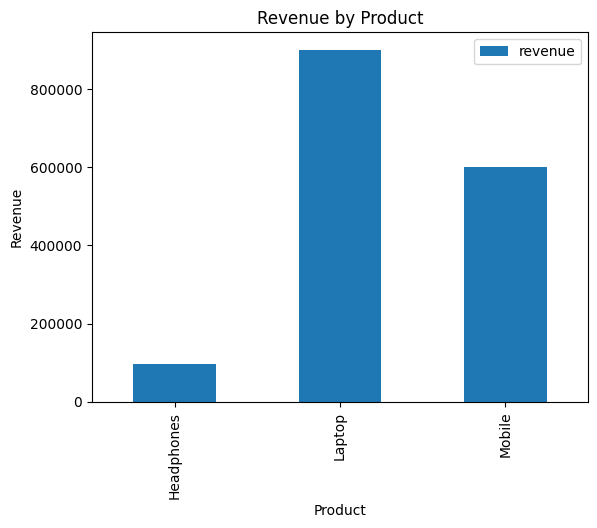

In [ ]:

import matplotlib.pyplot as plt

df.plot(kind='bar', x='product', y='revenue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.show()

Insight:

 The bar chart shows that Laptops produced the highest revenue, followed by Mobiles, while Headphones earned the lowest.

In [ ]:
plt.savefig("sales_chart.png")

<Figure size 640x480 with 0 Axes>